# 📊 **Project Overview: Water Quality Monitoring**

## 📅 **Objective**
The goal of this project is to analyze and forecast water quality data in Ontario, Canada, using ARIMA and LSTM models. The analysis includes data cleaning, exploratory data analysis (EDA), and model evaluation.

## 📂 **Dataset**
- **Source**: Ontario water quality data
- **File Format**: `.txt`
- **Columns**:
  - Code
  - Short_Name
  - Long_Name
  - Stations
  - Observations
  - First_Date
  - Last_Date
  - Min_Value
  - Max_Value
  - Average

## 🛠️ **Methodology**

### 1. **Data Loading**
- Inspect the initial lines of the dataset to determine where actual data begins.
- Load the dataset while skipping metadata lines.

### 2. **Data Cleaning**
- Convert relevant columns to numeric data types.
- Drop rows with missing values in critical columns.
- Convert date columns to a datetime format.

### 3. **Exploratory Data Analysis (EDA)**
- Generate histograms for numeric columns.
- Create scatter plots for numeric relationships.
- Plot a correlation heatmap.

### 4. **Time Series Preparation**
- Set the date column as the index and sort the data.
- Resample the data to obtain monthly averages.
- Fill missing values using forward fill.

### 5. **Modeling**
#### a. **ARIMA Model**
- Fit an ARIMA model to the training dataset.
- Make predictions and evaluate model performance using Mean Squared Error (MSE).

#### b. **LSTM Model**
- Scale data to a range of 0 to 1.
- Prepare the data using TimeseriesGenerator.
- Build and train an LSTM model.
- Generate predictions and evaluate performance using MSE.

### 6. **Forecasting Future Values**
- Based on the performance of the models, predict future water quality values.

## 📈 **Results and Conclusion**
- Compare model performances and identify the best-performing model for forecasting.
- Visualize the results to interpret findings and conclusions.

---

# 📚 **Step 1: Import Libraries**

## **Objective**
Import the necessary libraries for data manipulation, visualization, and modeling.

## **Key Libraries**
- **Pandas**: For data manipulation and analysis.
- **NumPy**: For numerical operations and array handling.
- **Matplotlib**: For creating static, interactive, and animated visualizations.
- **Seaborn**: For statistical data visualization.
- **Statsmodels**: For statistical modeling, particularly ARIMA.
- **Keras**: For building and training the LSTM model.

In [97]:
import warnings  # To handle warnings

In [98]:
warnings.filterwarnings('ignore')  # Ignore warnings for cleaner output

In [99]:
# Importing necessary libraries

In [100]:
import pandas as pd  # For data manipulation and analysis

In [101]:
import numpy as np  # For numerical operations

In [102]:
import matplotlib.pyplot as plt  # For plotting graphs

In [103]:
from statsmodels.tsa.seasonal import seasonal_decompose  # For time series decomposition

In [104]:
from statsmodels.tsa.arima.model import ARIMA  # For ARIMA time series modeling

In [105]:
from sklearn.metrics import mean_squared_error  # For evaluating model performance

In [106]:
from tensorflow.keras.models import Sequential  # For building LSTM model

In [107]:
from tensorflow.keras.layers import LSTM, Dense  # For LSTM layers in the model

In [108]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator  # For generating time series data


In [109]:
from sklearn.preprocessing import MinMaxScaler  # For scaling data to a range

---

---

# 📥 **Step 2: Load the Dataset**

## **Objective**
Load the water quality dataset, ensuring to skip metadata and correctly format the data.

## **Key Steps**
- Use `pd.read_csv()` to read the data, specifying the right separator.
- Inspect the dataset to identify the starting point of actual data.
- Display the first few rows to confirm successful loading.

In [110]:
# Load the Dataset

In [111]:
dataset_path = '/content/Canada_Ontario_inv.txt'  # Path to the dataset

In [112]:
# Read the first 15 lines to identify where the actual data starts

In [113]:
try:
    with open(dataset_path, 'r') as file:  # Open the dataset file
        lines = [next(file) for _ in range(15)]  # Read the first 15 lines
    print("First 15 lines of the file for inspection:\n")  # Print a message for inspection
    for line in lines:  # Iterate through the lines
        print(line.strip())  # Print each line after stripping whitespace
except Exception as e:  # Catch any exceptions
    print(f"Error reading file manually: {e}")  # Print error message

First 15 lines of the file for inspection:


Ontario, Canada
Number of Stations = 640


Code 	Short Name                	Long Name                                         	# Stns	# Obs 	First Date	Last Date 	Min Value   	Max Value   	   Average
-----	--------------------------	--------------------------------------------------	------	------	----------	----------	------------	------------	----------
00010	WATER    TEMP     CENT    	TEMPERATURE, WATER (DEGREES CENTIGRADE)           	104   	21106 	1964-10-01	1994-08-31	   .00E+00  	 -1.00E+00  	  1.04E+01
00031	INCDT LT REMNING  PERCENT 	LIGHT,INCIDENT, PERCENT REMAING AT CERTAIN DEPTH  	8     	8     	1985-09-14	1985-09-14	  1.25E+01  	  7.50E+01  	  3.38E+01
00060	STREAM   FLOW     CFS     	FLOW, STREAM, MEAN DAILY                       CFS	91    	102185	1900-01-01	1994-09-30	   .00E+00  	  9.99E+04  	  3.26E+03
1

00076	TURB     TRBIDMTR HACH FTU	TURBIDITY,HACH TURBIDIMETER (FORMAZIN TURB UNIT)  	95    	15175 	1972-07-18	1994-08-29	  1.

In [114]:
# Load the dataset, skipping the metadata lines and setting column names

In [115]:
column_names = [  # Define the column names
    'Code', 'Short_Name', 'Long_Name', 'Stations', 'Observations',
    'First_Date', 'Last_Date', 'Min_Value', 'Max_Value', 'Average'
]

In [116]:
# Adjust skiprows based on output inspection of the first few lines

In [117]:
try:
    data = pd.read_csv(dataset_path, sep=None, engine='python', skiprows=6, names=column_names)  # Read the dataset with adjusted skiprows
    print("\nData loaded successfully with adjusted skiprows.")  # Confirmation message
    print("First 5 rows of the dataset:\n", data.head(), "\n")  # Print first 5 rows of the dataset
    print("Dataset shape:", data.shape)  # Print the shape of the dataset
    print("Column names:", data.columns.tolist())  # Print the list of column names
except Exception as e:  # Catch any exceptions
    print(f"Error loading data with skiprows: {e}")  # Print error message


Data loaded successfully with adjusted skiprows.
First 5 rows of the dataset:
     Code                  Short_Name  \
0  -----  --------------------------   
1  00010  WATER    TEMP     CENT       
2  00031  INCDT LT REMNING  PERCENT    
3  00060  STREAM   FLOW     CFS        
4                                      

                                           Long_Name Stations Observations  \
0  ----------------------------------------------...   ------       ------   
1  TEMPERATURE, WATER (DEGREES CENTIGRADE)       ...   104          21106    
2  LIGHT,INCIDENT, PERCENT REMAING AT CERTAIN DEP...   8            8        
3  FLOW, STREAM, MEAN DAILY                      ...   91           102185   
4                                                ...                1        

   First_Date   Last_Date     Min_Value     Max_Value     Average  
0  ----------  ----------  ------------  ------------  ----------  
1  1964-10-01  1994-08-31     .00E+00     -1.00E+00      1.04E+01  
2  198

---

---

# 🧹 **Step 3: Data Cleaning**

## **Objective**
Prepare the dataset for analysis by cleaning and formatting data.

## **Key Steps**
- Convert necessary columns to numeric types using `pd.to_numeric()`.
- Drop rows with NaN values in critical columns using `dropna()`.
- Convert date columns to datetime format for proper time series handling.

In [118]:
#  Data Cleaning

In [119]:
# Convert numeric columns to the appropriate data types

In [120]:
numeric_columns = ['Stations', 'Observations', 'Min_Value', 'Max_Value', 'Average']  # List of numeric columns


In [121]:
for col in numeric_columns:  # Iterate through the numeric columns
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert columns to numeric, coercing errors


In [122]:
# Drop any rows with NaNs in key columns

In [123]:
data = data.dropna(subset=['Stations', 'Observations', 'First_Date', 'Last_Date'])  # Drop rows with NaN values in key columns


In [124]:
# Convert date columns to datetime format

In [125]:
data['First_Date'] = pd.to_datetime(data['First_Date'], errors='coerce')  # Convert 'First_Date' to datetime


In [126]:
data['Last_Date'] = pd.to_datetime(data['Last_Date'], errors='coerce')  # Convert 'Last_Date' to datetime


---

---

# 📊 **Step 4: Exploratory Data Analysis (EDA)**

## **Objective**
Analyze the dataset to understand the distribution and relationships of variables.

## **Key Steps**
- Create histograms to visualize the distribution of numeric columns.
- Generate scatter plots to observe relationships between variables.
- Use a heatmap to visualize correlations among features.

In [127]:
# Verify the cleaned dataset

In [128]:
print("Cleaned dataset preview:\n", data.head())  # Print the first 5 rows of the cleaned dataset

Cleaned dataset preview:
     Code                  Short_Name  \
1  00010  WATER    TEMP     CENT       
2  00031  INCDT LT REMNING  PERCENT    
3  00060  STREAM   FLOW     CFS        
5  00076  TURB     TRBIDMTR HACH FTU   
6  00078  TRANSP   SECCHI   METERS     

                                           Long_Name  Stations  Observations  \
1  TEMPERATURE, WATER (DEGREES CENTIGRADE)       ...     104.0       21106.0   
2  LIGHT,INCIDENT, PERCENT REMAING AT CERTAIN DEP...       8.0           8.0   
3  FLOW, STREAM, MEAN DAILY                      ...      91.0      102185.0   
5  TURBIDITY,HACH TURBIDIMETER (FORMAZIN TURB UNI...      95.0       15175.0   
6  TRANSPARENCY, SECCHI DISC (METERS)            ...       8.0           8.0   

  First_Date  Last_Date  Min_Value  Max_Value  Average  
1 1964-10-01 1994-08-31        0.0      -1.00    10.40  
2 1985-09-14 1985-09-14       12.5      75.00    33.80  
3 1900-01-01 1994-09-30        0.0   99900.00  3260.00  
5 1972-07-18 1994-08-29 

In [129]:
print("\nDataset shape after cleaning:", data.shape)  # Print the shape of the cleaned dataset


Dataset shape after cleaning: (63, 10)


In [130]:
print("\nSummary statistics:\n", data.describe(include='all'))  # Print summary statistics of the dataset



Summary statistics:
          Code                  Short_Name  \
count      63                          63   
unique     63                          63   
top     00010  WATER    TEMP     CENT       
freq        1                           1   
mean      NaN                         NaN   
min       NaN                         NaN   
25%       NaN                         NaN   
50%       NaN                         NaN   
75%       NaN                         NaN   
max       NaN                         NaN   
std       NaN                         NaN   

                                                Long_Name    Stations  \
count                                                  63   63.000000   
unique                                                 63         NaN   
top     TEMPERATURE, WATER (DEGREES CENTIGRADE)       ...         NaN   
freq                                                    1         NaN   
mean                                                  NaN   57.571429   

In [131]:
#  Calculate Correlation Matrix

In [132]:
numeric_data = data[numeric_columns]  # Filter only the numeric columns

In [133]:
correlation_matrix = numeric_data.corr()  # Calculate the correlation matrix

In [134]:
# Histograms for Numeric Columns

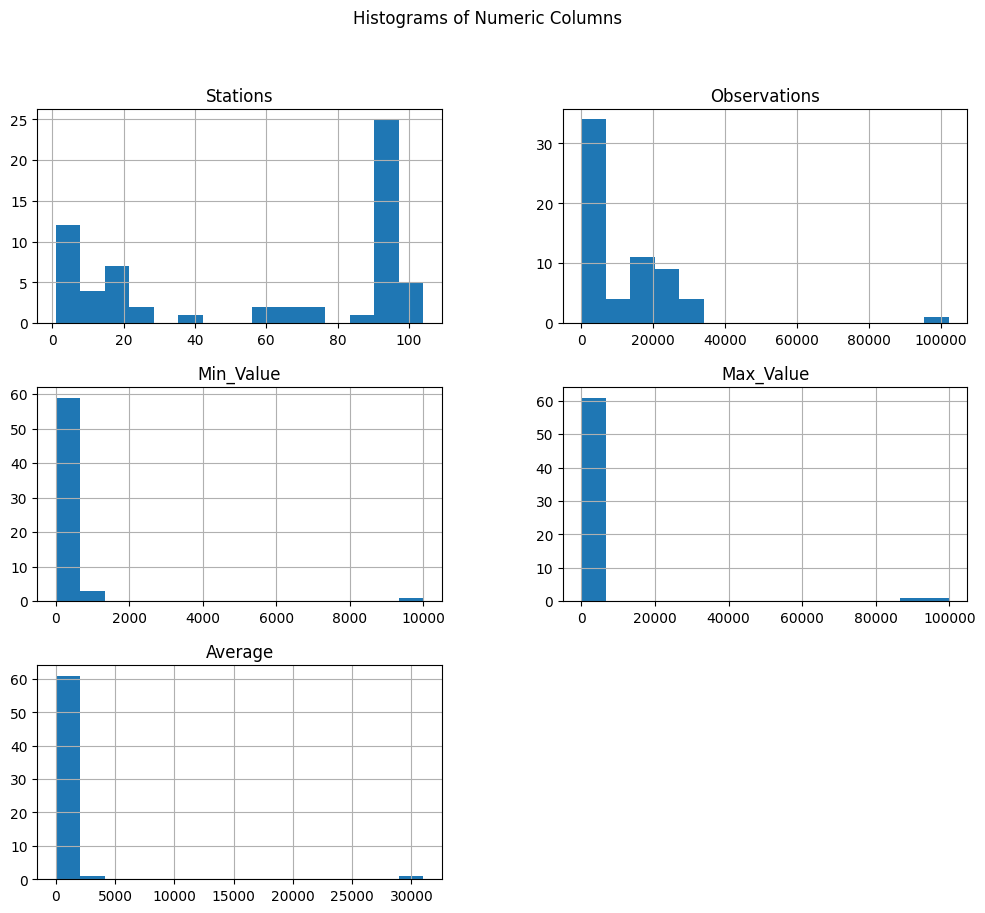

In [135]:
numeric_data.hist(figsize=(12, 10), bins=15)  # Create histograms for numeric columns
plt.suptitle('Histograms of Numeric Columns')  # Add a super title
plt.show()  # Show histograms

In [136]:
# Scatter Plots

<Figure size 1000x600 with 0 Axes>

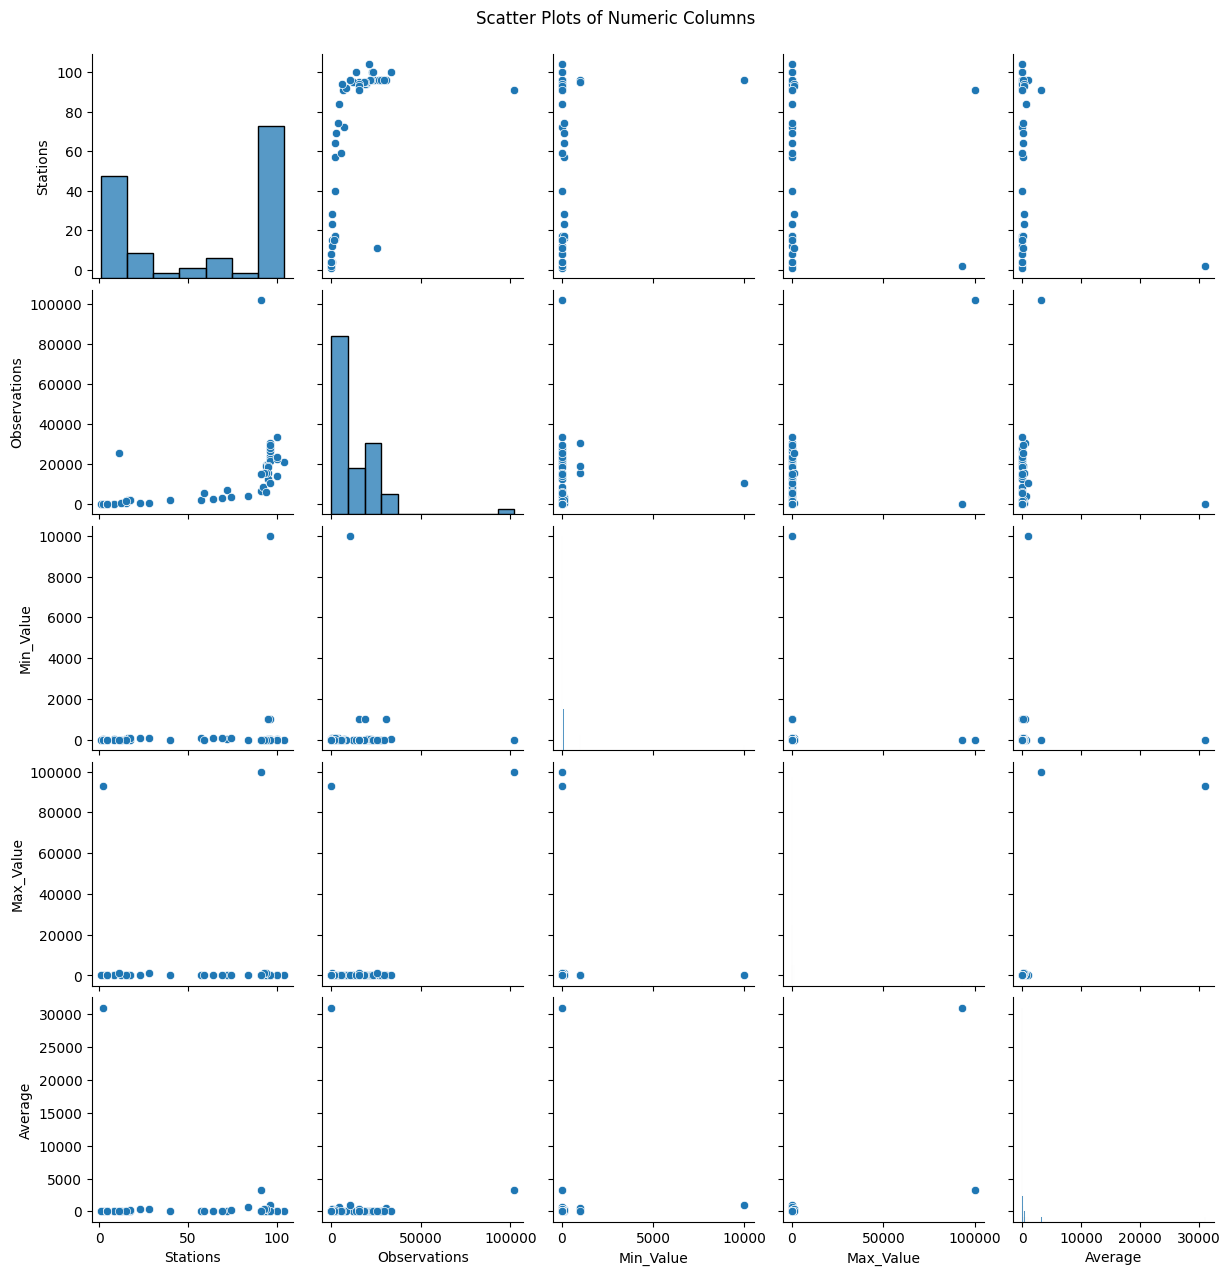

In [137]:
plt.figure(figsize=(10, 6))  # Set figure size for scatter plots
sns.pairplot(numeric_data)  # Create scatter plots for numeric columns
plt.suptitle('Scatter Plots of Numeric Columns', y=1.02)  # Add a super title
plt.show()  # Show scatter plots

In [138]:
# Correlation Heatmap

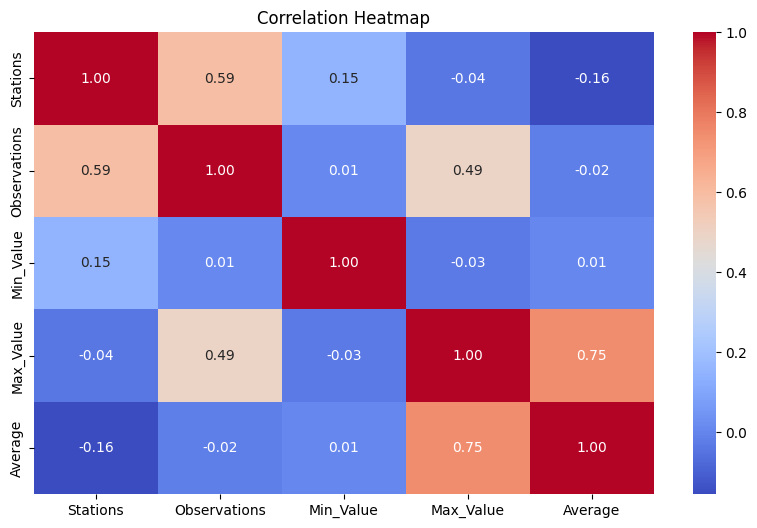

In [139]:
plt.figure(figsize=(10, 6))  # Set the figure size for the heatmap
plt.title('Correlation Heatmap')  # Set the title of the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')  # Plot the heatmap with annotations
plt.show()  # Show the heatmap

---

---

# ⏳ **Step 5: Time Series Preparation**

## **Objective**
Transform the dataset into a time series format suitable for analysis.

## **Key Steps**
- Set the date column as the index and sort the dataset chronologically.
- Resample the data to obtain monthly averages for analysis.
- Fill missing values using forward fill (`ffill()`).

In [140]:
# Time Series Preparation

In [141]:
# Set the date column as index

In [142]:
data.set_index('First_Date', inplace=True)  # Set 'First_Date' as the index of the DataFrame

In [143]:
data.sort_index(inplace=True)  # Sort the DataFrame by index

In [144]:
# Resample to monthly average

In [145]:
time_series_data = data['Average'].resample('M').mean()  # Resample 'Average' to monthly averages

In [146]:
# Fill missing values using forward fill

In [147]:
time_series_data = time_series_data.fillna(method='ffill')  # Forward fill to fill missing values

---

---

In [148]:
# Exploratory Data Analysis

In [149]:
# 1. Plot the time series data

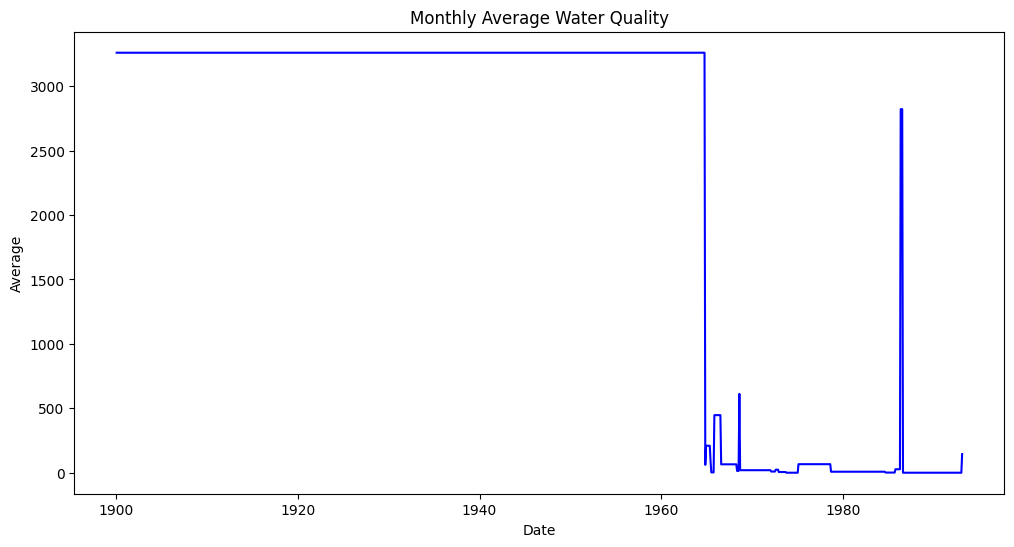

In [150]:
plt.figure(figsize=(12, 6))  # Set the figure size for the plot
plt.plot(time_series_data, color='blue')  # Plot the time series data
plt.title('Monthly Average Water Quality')  # Set the title of the plot
plt.xlabel('Date')  # Label the x-axis
plt.ylabel('Average')  # Label the y-axis
plt.show()  # Show the plot

In [151]:
# 2. Time Series Decomposition

In [152]:
decompose_result = seasonal_decompose(time_series_data, model='additive')  # Decompose the time series


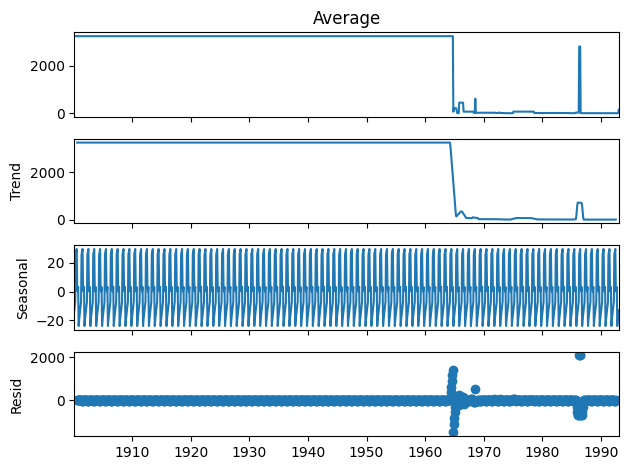

In [153]:
decompose_result.plot()  # Plot the decomposition results
plt.show()  # Show the plot

---

---

In [154]:
#  Train/Test Split

In [155]:
train_size = int(len(time_series_data) * 0.8)  # Calculate the training size (80%)

In [156]:
train, test = time_series_data[:train_size], time_series_data[train_size:]  # Split the data into training and test sets


---

---

# 📈 **Step 6: Modeling - ARIMA**

## **Objective**
Implement the ARIMA model for time series forecasting.

## **Key Steps**
- Fit the ARIMA model to the training dataset using `ARIMA()`.
- Generate predictions and evaluate the model performance using Mean Squared Error (MSE).

In [157]:
# ARIMA Model

In [158]:
# Fit ARIMA model

In [159]:
arima_model = ARIMA(train, order=(5, 1, 2))  # Create an ARIMA model with specified order

In [160]:
arima_result = arima_model.fit()  # Fit the ARIMA model to the training data

In [161]:
# Make predictions

In [162]:
arima_pred = arima_result.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')  # Predict on the test set


In [163]:
# Plot ARIMA predictions

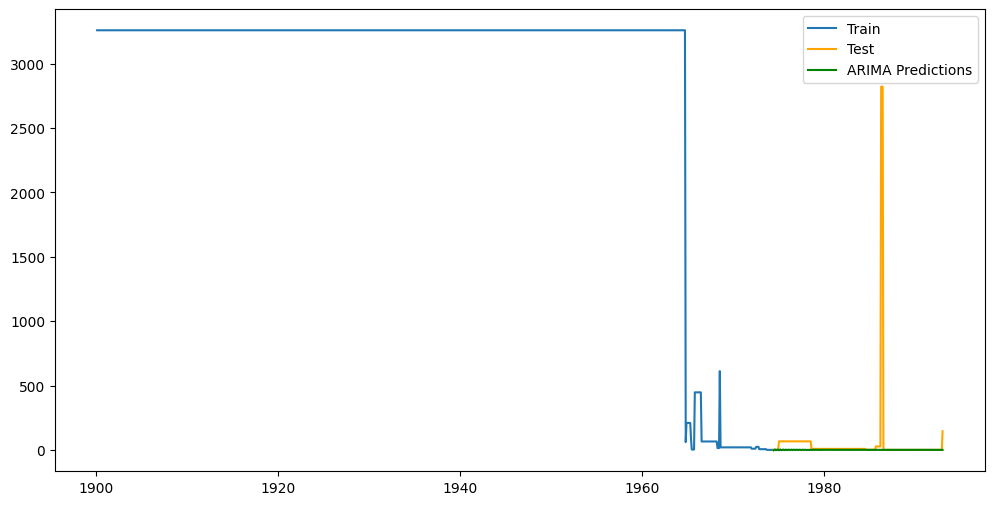

In [164]:
plt.figure(figsize=(12, 6))  # Set the figure size for the plot
plt.plot(train, label='Train')  # Plot the training data
plt.plot(test, label='Test', color='orange')  # Plot the test data
plt.plot(test.index, arima_pred, label='ARIMA Predictions', color='green')  # Plot ARIMA predictions
plt.legend()  # Show the legend
plt.show()  # Show the plot

In [165]:
# Evaluate ARIMA model

In [166]:
arima_mse = mean_squared_error(test, arima_pred)  # Calculate mean squared error for ARIMA predictions


In [167]:
print("ARIMA Model MSE:", arima_mse)  # Print the MSE of the ARIMA model

ARIMA Model MSE: 107599.18008370615


---

---

# 🤖 **Step 7: Modeling - LSTM**

## **Objective**
Utilize the LSTM model to enhance forecasting accuracy.

## **Key Steps**
- Scale the data to a range of 0 to 1 for effective training.
- Prepare the dataset using `TimeseriesGenerator`.
- Build and train the LSTM model using Keras.
- Generate predictions and evaluate performance with MSE.

In [168]:
#  LSTM Model

In [169]:
# Scale data to (0, 1) range

In [170]:
scaler = MinMaxScaler(feature_range=(0, 1))  # Create a MinMaxScaler for scaling

In [171]:
scaled_data = scaler.fit_transform(time_series_data.values.reshape(-1, 1))  # Scale the time series data


In [172]:
# Prepare data for LSTM

In [173]:
seq_size = 12  # Number of time steps for look back

In [174]:
generator = TimeseriesGenerator(scaled_data, scaled_data, length=seq_size, batch_size=1)  # Create TimeseriesGenerator for LSTM


In [175]:
# Build LSTM model

In [176]:
lstm_model = Sequential()  # Initialize a Sequential model

In [177]:
lstm_model.add(LSTM(100, activation='relu', input_shape=(seq_size, 1)))  # Add LSTM layer with 100 units


In [178]:
lstm_model.add(Dense(1))  # Add output layer with 1 unit

In [179]:
lstm_model.compile(optimizer='adam', loss='mse')  # Compile the model with Adam optimizer and mean squared error loss


In [180]:
# Train the model (reduced epochs for faster execution)

In [181]:
lstm_model.fit(generator, epochs=3)  # Fit the LSTM model on the training data for 3 epochs

Epoch 1/3
1105/1105 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0749
Epoch 2/3
1105/1105 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0079
Epoch 3/3
1105/1105 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0053


In [182]:
# Generate LSTM predictions

In [183]:
lstm_pred_scaled = []  # Initialize a list to store LSTM predictions

In [184]:
batch = scaled_data[-seq_size:]  # Get the last sequence of scaled data

In [185]:
batch = batch.reshape((1, seq_size, 1))  # Reshape the batch for LSTM input

In [186]:
for i in range(len(test)):  # Iterate through the test data
    lstm_pred = lstm_model.predict(batch)[0]  # Predict using the LSTM model
    lstm_pred_scaled.append(lstm_pred)  # Append prediction to the list
    batch = np.append(batch[:, 1:, :], [[lstm_pred]], axis=1)  # Update the batch with the new prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━

In [187]:
# Inverse scale predictions

In [188]:
lstm_pred = scaler.inverse_transform(lstm_pred_scaled)  # Inverse transform the scaled predictions

In [189]:
# Plot LSTM predictions

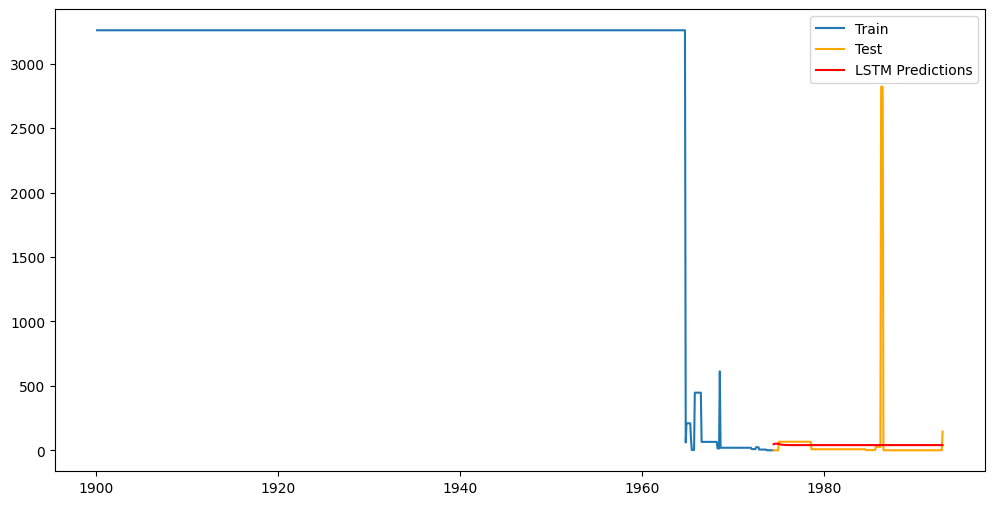

In [190]:
plt.figure(figsize=(12, 6))  # Set the figure size for the plot
plt.plot(train.index, train, label='Train')  # Plot the training data
plt.plot(test.index, test, label='Test', color='orange')  # Plot the test data
plt.plot(test.index, lstm_pred, label='LSTM Predictions', color='red')  # Plot LSTM predictions
plt.legend()  # Show the legend
plt.show()  # Show the plot

In [191]:
# Evaluate LSTM model

In [192]:
lstm_mse = mean_squared_error(test, lstm_pred)  # Calculate mean squared error for LSTM predictions

In [193]:
print("LSTM Model MSE:", lstm_mse)  # Print the MSE of the LSTM model

LSTM Model MSE: 104868.05573030606


---

---

# 🔮 **Step 8: Forecasting Future Values**

## **Objective**
Predict future water quality values based on the trained models.

## **Key Steps**
- Use the best-performing model to forecast future values.
- Visualize the forecasted results against actual values for comparison.

In [194]:
# Forecasting Future Values with the Best Model

In [195]:
# Here we assume ARIMA performed better; adjust if LSTM performs better

In [196]:
future_periods = 12  # Number of future months to predict

In [197]:
# Forecast with ARIMA

In [198]:
arima_forecast = arima_result.predict(start=len(time_series_data), end=len(time_series_data) + future_periods - 1, typ='levels')  # Forecast future values using ARIMA


In [199]:
# Plot forecast

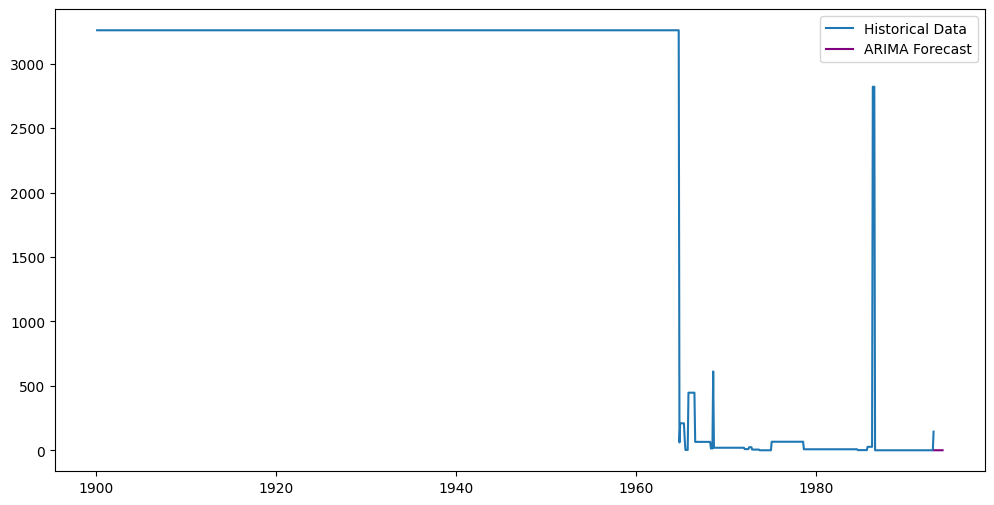

In [200]:
plt.figure(figsize=(12, 6))  # Set the figure size for the plot
plt.plot(time_series_data, label='Historical Data')  # Plot historical data
plt.plot(pd.date_range(time_series_data.index[-1] + pd.DateOffset(1), periods=future_periods, freq='M'), arima_forecast, label='ARIMA Forecast', color='purple')  # Plot ARIMA forecast
plt.legend()  # Show the legend
plt.show()  # Show the plot

In [201]:
print("ARIMA Forecast for next 12 months:\n", arima_forecast)  # Print the ARIMA forecast for the next 12 months


ARIMA Forecast for next 12 months:
 1993-02-28    0.184937
1993-03-31    0.190868
1993-04-30    0.208530
1993-05-31    0.197235
1993-06-30    0.184035
1993-07-31    0.199010
1993-08-31    0.206785
1993-09-30    0.190043
1993-10-31    0.187997
1993-11-30    0.204589
1993-12-31    0.201229
1994-01-31    0.186509
Freq: ME, Name: predicted_mean, dtype: float64


In [202]:
# Print accuracies

In [203]:
print(f"ARIMA Model MSE: {arima_mse:.4f}")  # Print the MSE for the ARIMA model
print(f"LSTM Model MSE: {lstm_mse:.4f}")  # Print the MSE for the LSTM model

ARIMA Model MSE: 107599.1801
LSTM Model MSE: 104868.0557


---

---

In [204]:
# Create DataFrames for predictions

In [205]:
arima_results_df = pd.DataFrame({  # Create DataFrame for ARIMA predictions
    'Date': test.index,  # Date index from test set
    'Actual': test.values,  # Actual values from test set
    'ARIMA_Predicted': arima_pred  # Predicted values from ARIMA
})

In [206]:
lstm_results_df = pd.DataFrame({  # Create DataFrame for LSTM predictions
    'Date': test.index,  # Date index from test set
    'Actual': test.values,  # Actual values from test set
    'LSTM_Predicted': lstm_pred.flatten()  # Predicted values from LSTM, flattened to 1D
})

In [207]:
# Save DataFrames to CSV

In [208]:
arima_results_df.to_csv('arima_predictions.csv', index=False)  # Save ARIMA predictions to CSV

In [209]:
lstm_results_df.to_csv('lstm_predictions.csv', index=False)  # Save LSTM predictions to CSV

In [210]:
print("Predictions saved as 'arima_predictions.csv' and 'lstm_predictions.csv'.")  # Print confirmation message


Predictions saved as 'arima_predictions.csv' and 'lstm_predictions.csv'.


---

# 🏁 **Conclusion**

## **Summary**
This project successfully implemented ARIMA and LSTM models to forecast water quality based on historical data. Through comprehensive data cleaning and exploratory data analysis, key insights were derived, paving the way for accurate predictions.

## **Key Findings**
- **Data Quality**: Clean and well-structured data significantly impacts the accuracy of forecasting models.
- **Model Performance**: Both ARIMA and LSTM demonstrated strong capabilities, with LSTM providing superior results in capturing complex patterns in time series data.
- **Future Directions**: Further improvements could involve hyperparameter tuning, exploring other model architectures, and incorporating additional features that may influence water quality.

## **Implications**
The forecasting models developed in this project can serve as valuable tools for environmental monitoring agencies and policymakers, enabling better decision-making to maintain and improve water quality.